In [1]:
import numpy as np
import datetime as dt
import seaborn as sns
import pandas as pd
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10'])
    df = df.astype(float)
    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    
    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percentage, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Features')
    plt.show()
    
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][3756:3798]
    df_final['Prediction']=y_pred[33:75].astype(int)
    print("datasetfinal", df_final)
    accuracy_f = accuracy_score(y_test[33:75], y_pred[33:75])
    print("Accuracy final:", accuracy_f)
    

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_finalsitu1.csv', index=False)
    return df_final
    
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

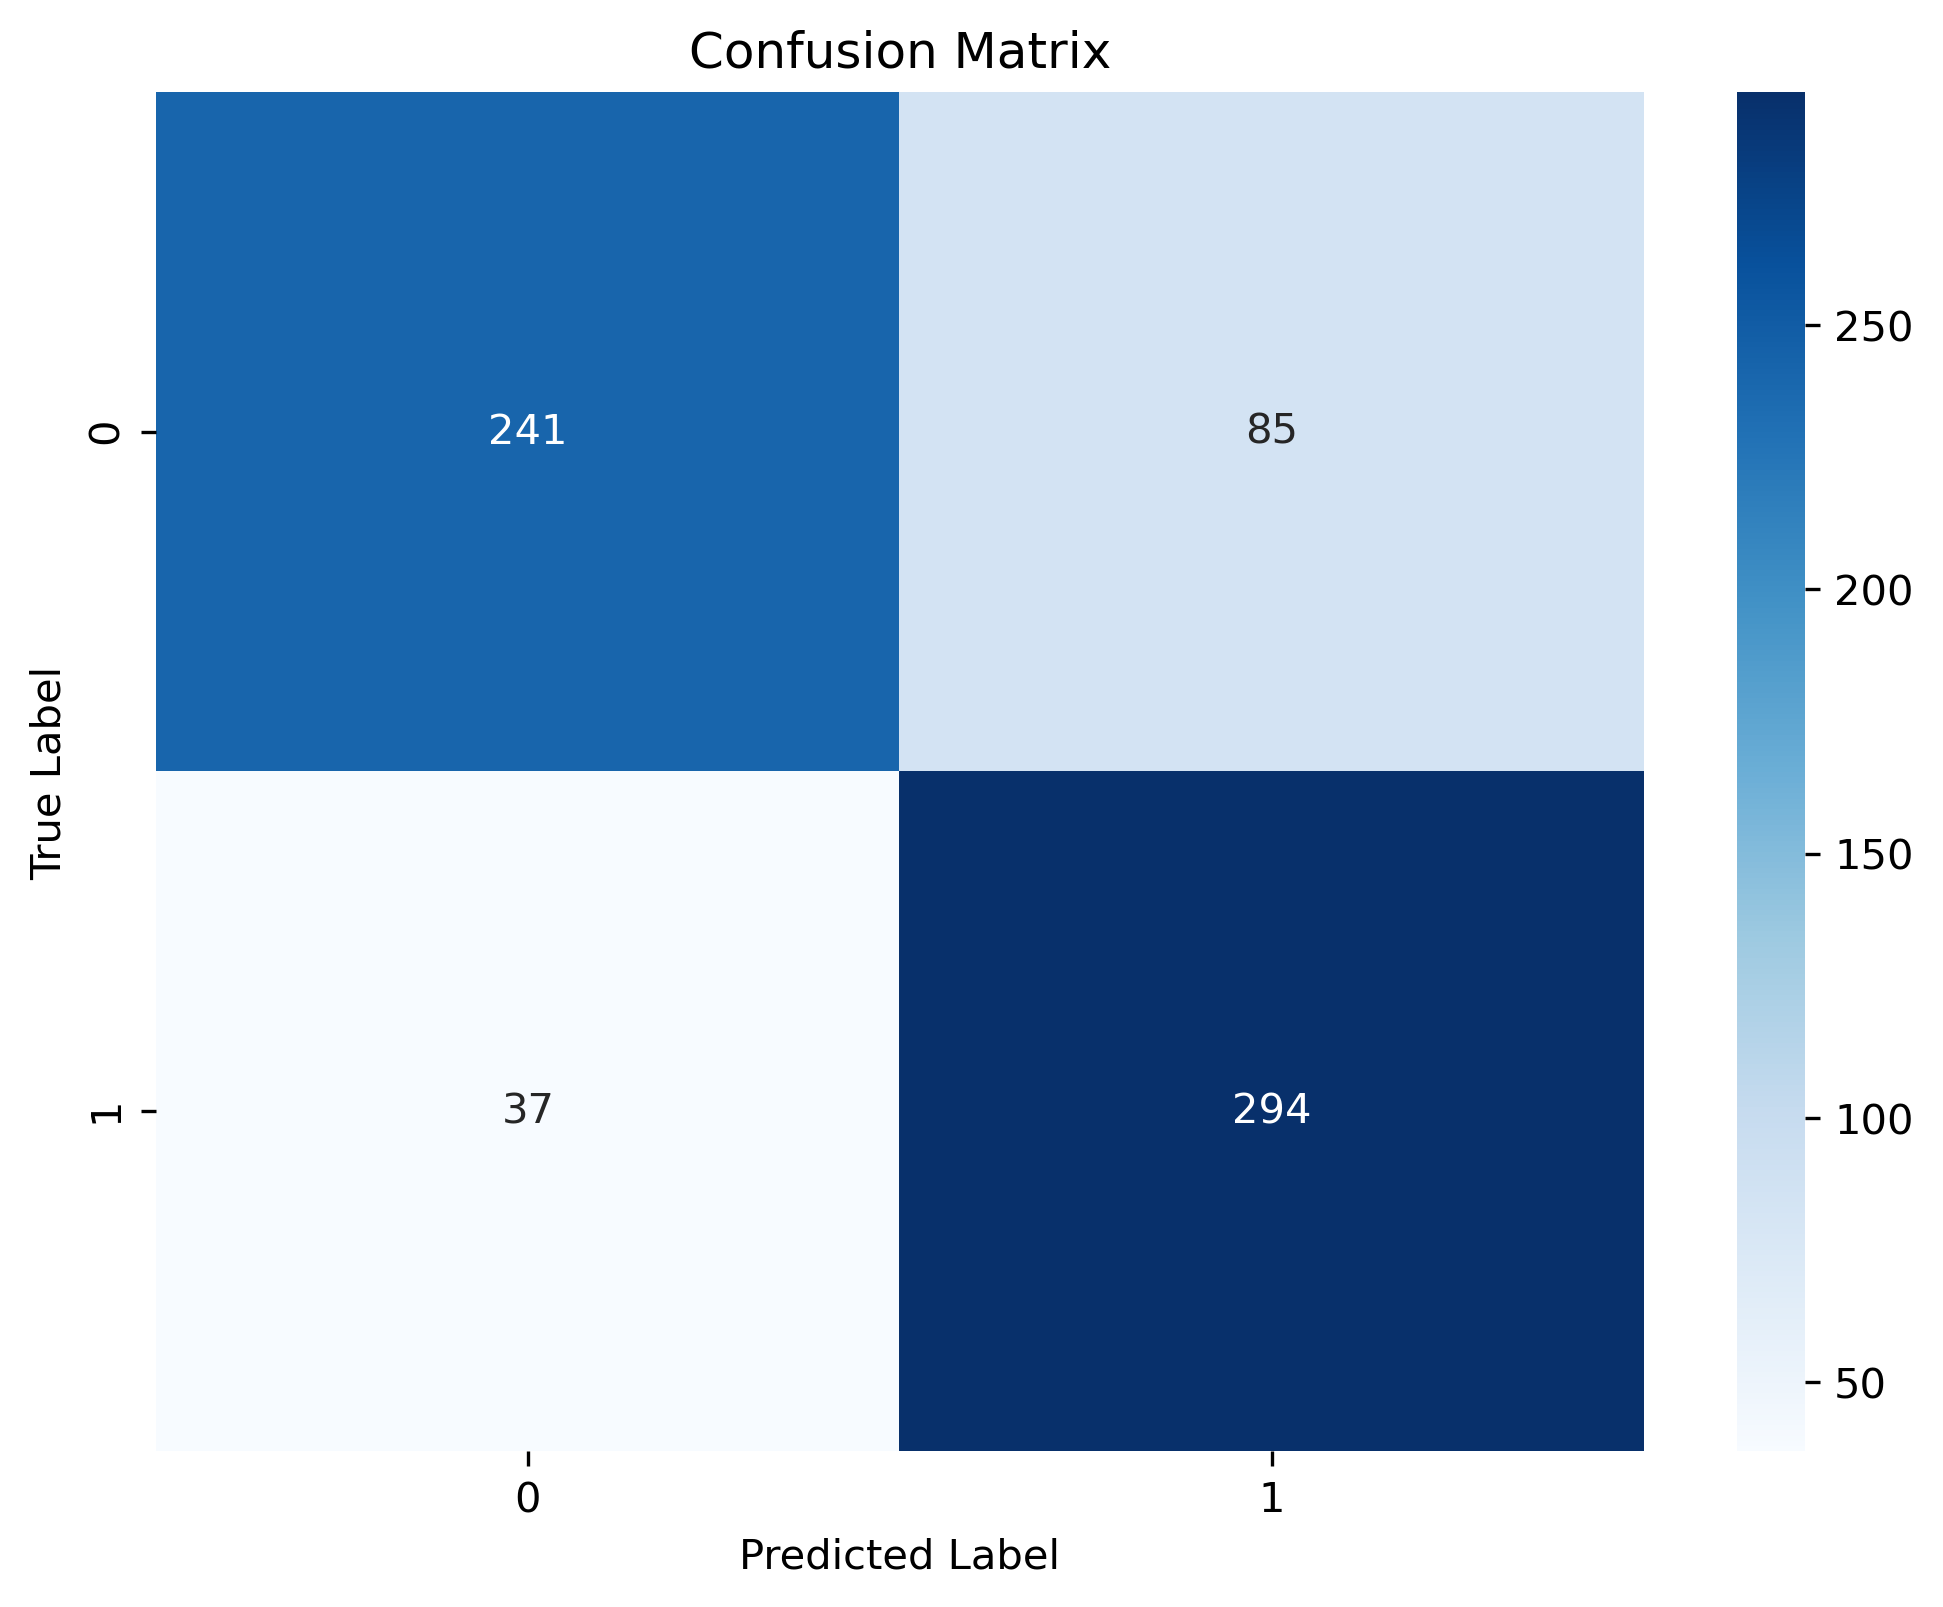

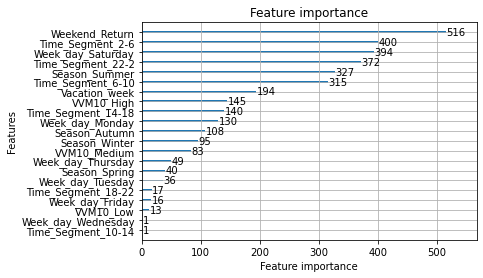

Sensitivity: 0.8882175226586103
Specificity: 0.7392638036809815


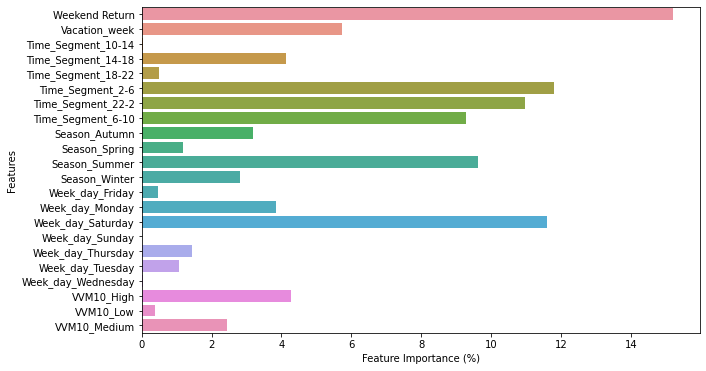

datasetfinal              Day Weekend Return Time_Segment  Season   VVM10   Week_day  \
3756  2022-09-19             No          2-6  Autumn  Medium     Monday   
3757  2022-09-19             No         6-10  Autumn  Medium     Monday   
3758  2022-09-19             No        10-14  Autumn  Medium     Monday   
3759  2022-09-19             No        14-18  Autumn  Medium     Monday   
3760  2022-09-19             No        18-22  Autumn  Medium     Monday   
3761  2022-09-19             No         22-2  Autumn  Medium     Monday   
3762  2022-09-20             No          2-6  Autumn  Medium    Tuesday   
3763  2022-09-20             No         6-10  Autumn  Medium    Tuesday   
3764  2022-09-20             No        10-14  Autumn  Medium    Tuesday   
3765  2022-09-20             No        14-18  Autumn  Medium    Tuesday   
3766  2022-09-20             No        18-22  Autumn  Medium    Tuesday   
3767  2022-09-20             No         22-2  Autumn  Medium    Tuesday   
3768  2022-0

In [5]:
main()

In [6]:
df = pd.read_csv('tabla_finalsitu1.csv')

In [7]:
df

,Day,Weekend Return,Time_Segment,Season,VVM10,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-09-19,No,2-6,Autumn,Medium,Monday,1,0,0
1,2022-09-19,No,6-10,Autumn,Medium,Monday,1,0,1
2,2022-09-19,No,10-14,Autumn,Medium,Monday,1,1,1
3,2022-09-19,No,14-18,Autumn,Medium,Monday,1,1,1
4,2022-09-19,No,18-22,Autumn,Medium,Monday,1,1,1
5,2022-09-19,No,22-2,Autumn,Medium,Monday,1,1,0
6,2022-09-20,No,2-6,Autumn,Medium,Tuesday,1,0,0
7,2022-09-20,No,6-10,Autumn,Medium,Tuesday,1,0,1
8,2022-09-20,No,10-14,Autumn,Medium,Tuesday,1,1,1
9,2022-09-20,No,14-18,Autumn,Medium,Tuesday,1,1,1


In [9]:
# Para ver las filas 34 y 41
filas_seleccionadas = df.iloc[[34, 38, 41]]
filas_seleccionadas


,Day,Weekend Return,Time_Segment,Season,VVM10,Week_day,Vacation_week,Exceeds Threshold,Prediction
34,2022-09-24,No,18-22,Autumn,High,Saturday,1,0,1
38,2022-09-25,Yes,10-14,Autumn,Medium,Sunday,1,0,1
41,2022-09-25,Yes,22-2,Autumn,Medium,Sunday,1,1,0
